In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
champ = pd.read_csv('../datasets/worlds/Worlds 2020 Play-In - Champion Stats - OraclesElixir.csv')

In [3]:
champ

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Top,1,2.6%,0.0%,2.6%,0%,0%,1,3,...,598,155,12,6.6,20.3%,206,21.0%,20.0%,0.36,0.16
1,Akali,Middle,1,2.6%,28.9%,31.6%,0%,0%,0,4,...,-15,108,-5,7.3,20.6%,411,27.6%,18.6%,0.4,0.03
2,Alistar,Support,11,28.9%,18.4%,47.4%,82%,100%,14,31,...,3,46,-6.4,1,2.6%,152,7.1%,9.5%,1.51,0.32
3,Aphelios,ADC,1,2.6%,0.0%,2.6%,0%,0%,0,6,...,-613,145,4,7.6,30.2%,395,20.0%,20.0%,0.27,0.17
4,Ashe,ADC,10,26.3%,21.1%,47.4%,20%,10%,19,29,...,141,193,8.5,9.1,30.1%,469,26.1%,26.1%,0.44,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Wukong,Top,8,21.1%,2.6%,28.9%,50%,50%,30,21,...,-18,-132,-10,7.5,26.0%,405,20.6%,24.7%,0.43,0.15
85,Xayah,ADC,1,2.6%,0.0%,2.6%,0%,100%,4,4,...,68,185,2,10.4,41.8%,459,33.7%,34.5%,0.45,0.33
86,Ziggs,ADC,2,5.3%,2.6%,10.5%,50%,100%,4,2,...,55,233,-2.5,8.9,29.7%,602,36.4%,27.0%,0.33,0.15
87,Ziggs,Middle,1,2.6%,2.6%,10.5%,0%,100%,1,2,...,1459,-76,-2,10.1,31.8%,592,40.3%,31.2%,0.51,0.42


In [4]:
most_played = champ[['Champion','Pos','GP']].sort_values(by='GP',ascending=False).head(10)

In [5]:
most_played

,Champion,Pos,GP
36,Leona,Support,18
22,Graves,Jungle,17
37,Lillia,Jungle,16
56,Senna,ADC,15
10,Camille,Top,13
54,Rakan,Support,13
17,Ezreal,ADC,13
26,Jhin,ADC,12
50,Ornn,Top,11
55,Renekton,Top,11


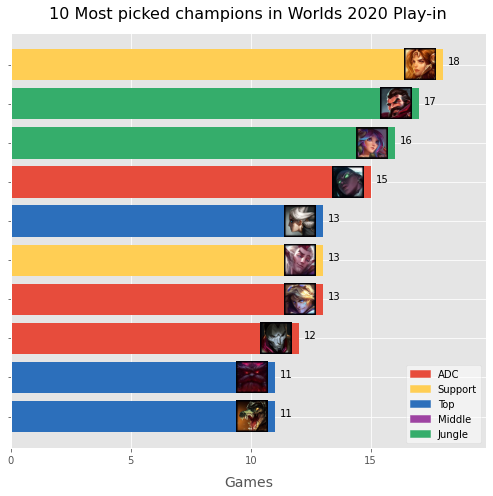

In [6]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 7))

colors = {'ADC':'#e74c3c','Support':'#ffce54','Top':'#2c6fbb','Middle':'#9e43a2','Jungle':'#35ad6b'}
roles = most_played['Pos'][::-1].apply(lambda x: colors[x])
       
x = most_played['Champion'][::-1]
y = most_played['GP'].sort_values()
width = 0.8

ax.barh(x, y, width, align='center', color=roles)
ax.set_title('10 Most picked champions in Worlds 2020 Play-in', fontsize=16, pad=15)
ax.set_yticklabels('')

plt.xlabel('Games', fontsize=14, labelpad=10)
plt.xticks(np.arange(0,(max(y)+3 if max(y)%2==0 else max(y)+2), 5))
plt.xlim(0, max(y) * 1.1)
plt.ylim(-0.8, len(x) - 0.2)

for i, (label, value) in enumerate(zip(x, y)):
    img = plt.imread(f'../lol-icons/{label}.png')
    plt.imshow(img, extent=[value - 1.6, value - 0.3, i - width/2, i + width / 2], aspect='auto', zorder=1)
    
for i, v in enumerate(y):
     ax.text(v + 0.2, i, str(v), color='black')

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, facecolor='white', framealpha=0.5)       
plt.tight_layout()
plt.show()

In [7]:
d_perc = lambda x: float(x[:-1])

In [8]:
champ['B%'] = champ['B%'].apply(d_perc)

In [9]:
most_banned = champ[['Champion','Pos','B%']].sort_values(by='B%',ascending=False)

In [10]:
most_banned = pd.DataFrame.drop_duplicates(most_banned, subset=['Champion'],keep='last')
most_banned = most_banned.head(10)

In [11]:
most_banned

,Champion,Pos,B%
46,Nidalee,Jungle,60.5
50,Ornn,Top,57.9
49,Orianna,Middle,57.9
38,Lucian,Middle,47.4
37,Lillia,Jungle,44.7
55,Renekton,Top,42.1
61,Shen,Top,39.5
6,Bard,Support,31.6
22,Graves,Jungle,31.6
45,Nautilus,Support,28.9


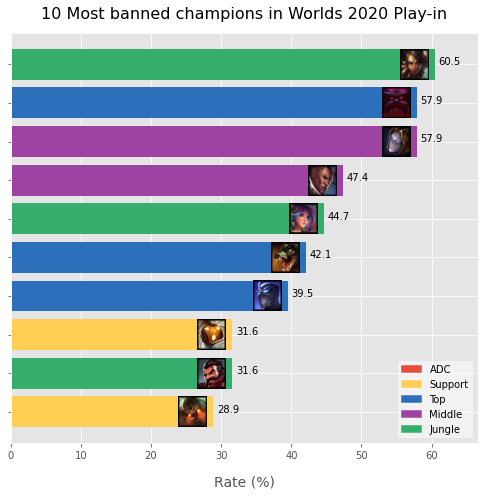

In [12]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 7))

x = most_banned['Champion'][::-1]
y = most_banned['B%'].sort_values()
roles = most_banned['Pos'][::-1].apply(lambda x: colors[x])

for i, v in enumerate(y):
     ax.text(v + 0.5, i, str(v), color='black')

width = 0.8
ax.barh(x, y, width, align='center',color=roles)
ax.set_title('10 Most banned champions in Worlds 2020 Play-in', fontsize=16, pad=15)
plt.xlabel('Rate (%)', fontsize=14,labelpad=15)
ax.set_yticklabels('')

for i, (label, value) in enumerate(zip(x, y)):
    img = plt.imread(f'../lol-icons/{label}.png')
    plt.imshow(img, extent=[value - 5, value -1, i - width/2, i + width / 2], aspect='auto', zorder=1)

plt.xlim(0, max(y) * 1.1)
plt.ylim(-0.8, len(x) - 0.2)
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, facecolor='white', framealpha=0.5)    
plt.tight_layout()
plt.show()